In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [154]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")
test_ids = df_test.Id
SalePrices = df_train.SalePrice
# Drop id
df_train.drop("Id", axis=1, inplace=True)
df_test.drop("Id", axis=1, inplace=True)

In [155]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [156]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [157]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Delete cells with large number of missing data

In [158]:
columns_to_drop = ["Alley", "PoolQC", "Fence", "MiscFeature"]
df_train.drop(columns_to_drop, axis=1, inplace=True)
df_test.drop(columns_to_drop, axis=1, inplace=True)

In [159]:
def missing_data(train):
    total = train.isnull().sum().sort_values(ascending=False)
    percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data["Total"] > 0]

missing_data(df_train)

,Total,Percent
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342


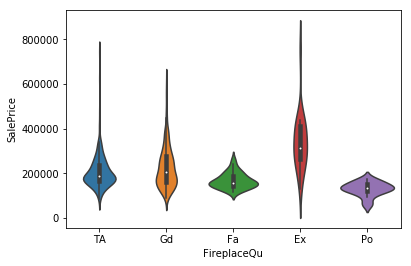

In [160]:
sns.violinplot(x="FireplaceQu", y="SalePrice", data=df_train)


In [161]:
df_train.drop(["FireplaceQu"], axis=1, inplace=True)
df_test.drop(["FireplaceQu"], axis=1, inplace=True)

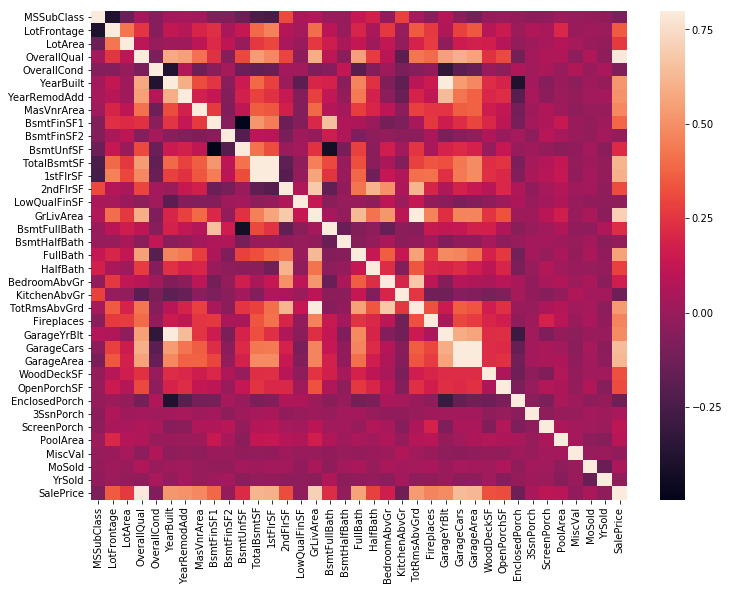

In [162]:
f, ax = plt.subplots(figsize=(12, 9))
corrmat = df_train.corr()
sns.heatmap(corrmat, vmax=.8)

In [163]:
# TotalBsmtSF and 1stFlrSF are highly correlated. I'll delete one of these features
df_train.drop(["1stFlrSF"], axis=1, inplace=True)
df_test.drop(["1stFlrSF"], axis=1, inplace=True)

# GarageCars and GarageArea are highly corr. Delete one
df_train.drop(["GarageArea"], axis=1, inplace=True)
df_test.drop(["GarageArea"], axis=1, inplace=True)

# Delete GarageYrBlt highly correlated to YrBuilt
df_train.drop(["GarageYrBlt"], axis=1, inplace=True)
df_test.drop(["GarageYrBlt"], axis=1, inplace=True)

In [164]:
corrmat["SalePrice"]

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

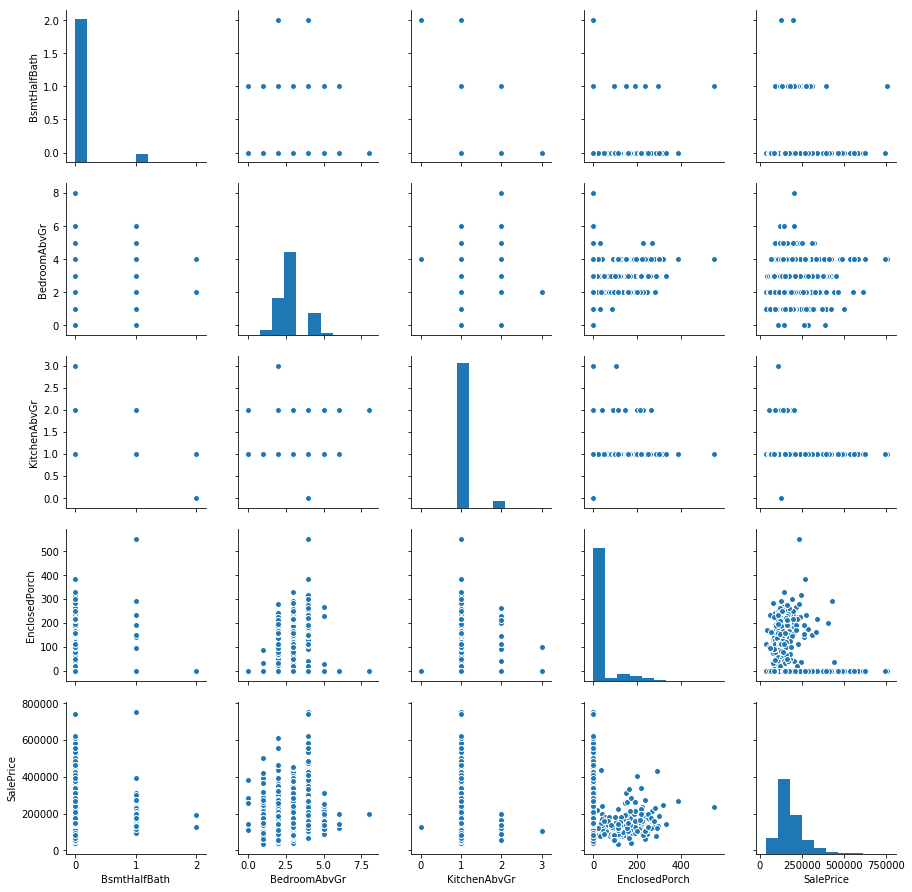

In [165]:
cors = corrmat["SalePrice"]
low_cor_columns = list(cors[abs(cors) < 0.2].index.values)
sns.pairplot(df_train[low_cor_columns[4:8]+ ["SalePrice"]], dropna=True)


In [166]:
df_train.drop(low_cor_columns, axis=1, inplace=True)
df_test.drop(low_cor_columns, axis=1, inplace=True)

In [167]:
# There seem to be outliers in SalePrice, Ill delete them
outliers = df_train[df_train["SalePrice"] > 514000].index
df_train.drop(outliers, inplace=True)
outliers = df_train[df_train["LotFrontage"] > 250].index
df_train.drop(outliers, inplace=True)

## Filling missing data

In [168]:
# Fill LotFrontage nans
lf_avg = df_train['LotFrontage'].mean()
lf_std = df_train['LotFrontage'].std()
lf_null_count = df_train['LotFrontage'].isnull().sum()
lf_null_random_list = np.random.randint(lf_avg - lf_std, lf_avg + lf_std, size=lf_null_count)
# df_train.loc[:, 'Age'][np.isnan(df_train['Age'])] = age_null_random_list
df_train.loc[np.isnan(df_train['LotFrontage']), 'LotFrontage'] = lf_null_random_list

lf_null_count = df_test['LotFrontage'].isnull().sum()
lf_null_random_list = np.random.randint(lf_avg - lf_std, lf_avg + lf_std, size=lf_null_count)
# df_train.loc[:, 'Age'][np.isnan(df_train['Age'])] = age_null_random_list
df_test.loc[np.isnan(df_test['LotFrontage']), 'LotFrontage'] = lf_null_random_list
# Create garage? feature
df_test["GarageCars"] = df_test["GarageCars"].fillna(df_test.GarageCars.median())
df_train["Garage"] = 0
df_train.loc[df_train.GarageCars > 0, "Garage"] = 1
df_test["Garage"] = 0
df_test.loc[df_test.GarageCars > 0, "Garage"] = 1

df_train.loc[:, ["GarageCond", "GarageType", "GarageQual", "GarageFinish"]] = df_train.loc[:, ["GarageCond", "GarageType", "GarageQual", "GarageFinish"]].fillna("NoGarage")
df_test.loc[:, ["GarageCond", "GarageType", "GarageQual", "GarageFinish"]] = df_test.loc[:, ["GarageCond", "GarageType", "GarageQual", "GarageFinish"]].fillna("NoGarage")


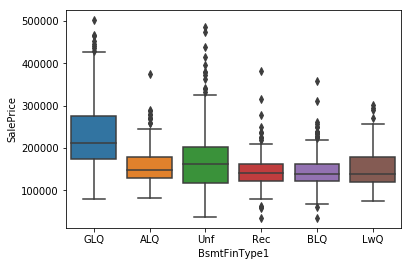

In [169]:
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=df_train)


In [170]:
df_train["BsmtFinTpGLQ"] = 0
df_train.loc[df_train.BsmtFinType1 == "GLQ", "BsmtFinTpGLQ"] = 1

df_test["BsmtFinTpGLQ"] = 0
df_test.loc[df_test.BsmtFinType1 == "GLQ", "BsmtFinTpGLQ"] = 1

bsmt_features = ["BsmtFinType2", "BsmtFinType1", "BsmtExposure", "BsmtFinSF1", "BsmtUnfSF"]
df_train.drop(bsmt_features, axis=1, inplace=True)
df_test.drop(bsmt_features, axis=1, inplace=True)

df_train.loc[:, ["BsmtCond", "BsmtQual"]] = df_train.loc[:, ["BsmtCond", "BsmtQual"]].fillna("No")
df_test.loc[:, ["BsmtCond", "BsmtQual"]] = df_test.loc[:, ["BsmtCond", "BsmtQual"]].fillna("No")


In [171]:
df_train.MasVnrType.value_counts()  # None is most common by a lot

None       862
BrkFace    442
Stone      123
BrkCmn      15
Name: MasVnrType, dtype: int64

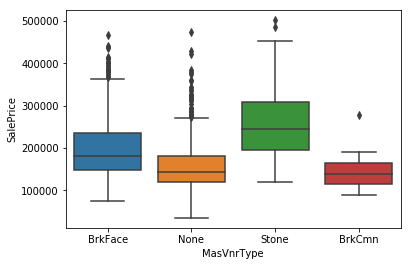

In [172]:
sns.boxplot(x="MasVnrType", y="SalePrice", data=df_train) #There is difference between types

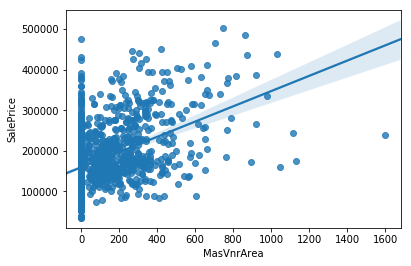

In [173]:
sns.regplot("MasVnrArea", "SalePrice", data=df_train)


In [174]:
df_train[["MasVnrArea", "SalePrice"]].corr() #0.45


,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.452206
SalePrice,0.452206,1.000000


In [175]:
df_train["MasVnrType"].fillna("None", inplace=True)
df_test["MasVnrType"].fillna("None", inplace=True)

df_train["MasVnrArea"].fillna(0, inplace=True)
df_test["MasVnrArea"].fillna(0, inplace=True)

#Electrical
df_train.Electrical.fillna(df_train.Electrical.mode()[0], inplace=True)

#Fill missing values of cat data in test set
cat_cols = ["MSZoning", "Utilities", "Functional", "SaleType", "Exterior2nd", "Exterior1st", "KitchenQual"]
for col in cat_cols:
    df_test.loc[:, [col]] = df_test[col].fillna(df_train[col].mode()[0])

df_test["BsmtFullBath"].fillna(df_train["BsmtFullBath"].median(), inplace=True)
df_test["TotalBsmtSF"].fillna(df_train["TotalBsmtSF"].mean(), inplace=True)


In [176]:
# Change YearBuilt to Antiquity
df_train["Antiquity"] = 2010 - df_train["YearBuilt"]
df_test["Antiquity"] = 2010 - df_test["YearBuilt"]
df_train.drop(["YearBuilt"], axis=1, inplace=True)
df_test.drop(["YearBuilt"], axis=1, inplace=True)

## Scaling, normalization and one-hot encoding

In [177]:
numeric = df_train.select_dtypes(include=[np.number]).drop(["SalePrice", "Garage", "BsmtFinTpGLQ"], axis=1)
numeric_test = df_test.select_dtypes(include=[np.number]).drop(["Garage", "BsmtFinTpGLQ"], axis=1)
category = df_train.select_dtypes(exclude=[np.number])
category_test = df_test.select_dtypes(exclude=[np.number])

In [178]:
numeric.head()

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,Antiquity
0,65.0,8450,7,2003,196.0,856,854,1710,1,2,1,8,0,2,0,61,7
1,80.0,9600,6,1976,0.0,1262,0,1262,0,2,0,6,1,2,298,0,34
2,68.0,11250,7,2002,162.0,920,866,1786,1,2,1,6,1,2,0,42,9
3,60.0,9550,7,1970,0.0,756,756,1717,1,1,0,7,1,3,0,35,95
4,84.0,14260,8,2000,350.0,1145,1053,2198,1,2,1,9,1,3,192,84,10


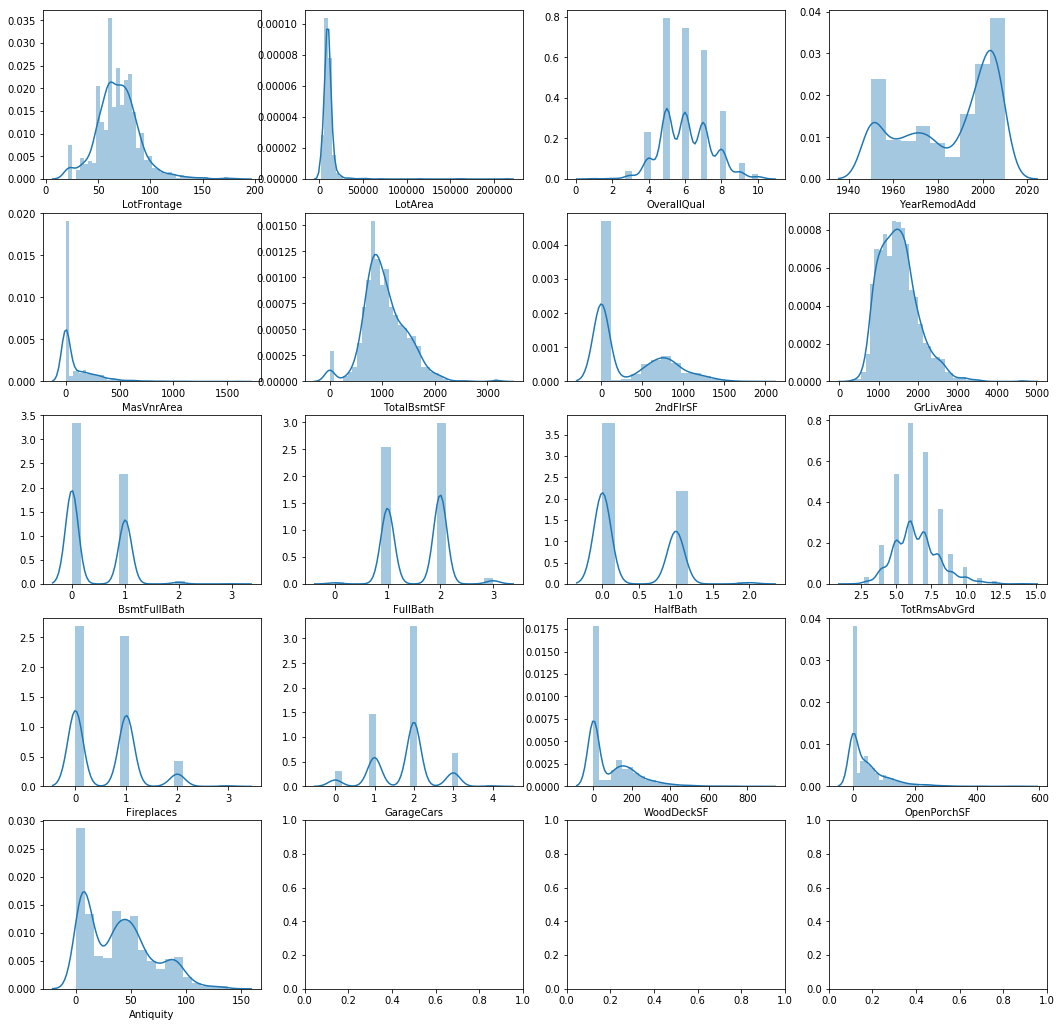

In [179]:
f,ax=plt.subplots(5,4,figsize=(18,18)) # Subplots
ax = ax.flatten()
#sns.distplot(df_train["LotFrontage"], ax=ax[0])
for i, col in enumerate(numeric.columns):
    #print (i,col)
    sns.distplot(df_train[col], ax=ax[i])

In [180]:
from scipy.stats import boxcox
from scipy.stats import skew

In [181]:
skewed_feats = numeric.apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]

In [182]:
skewed_feats

LotArea        12.778200
MasVnrArea      2.565329
2ndFlrSF        0.766348
GrLivArea       0.926199
WoodDeckSF      1.549799
OpenPorchSF     2.375917
dtype: float64

In [183]:
skewed_feats_index = skewed_feats.index
#numeric[skewed_feats_index] = np.log1p(numeric[skewed_feats_index])
#numeric_test[skewed_feats_index] = np.log1p(numeric_test[skewed_feats_index])
for col in skewed_feats_index:
    if df_train[col].min() > 0:
        df_train[col], _ = boxcox(df_train[col])
        df_test[col], _ = boxcox(df_test[col])
    else:
        df_train[col] = np.log1p(df_train[col])
        df_test[col] = np.log1p(df_test[col])

/usr/lib/python3.6/site-packages/scipy-1.0.0-py3.6-linux-x86_64.egg/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/usr/lib/python3.6/site-packages/scipy-1.0.0-py3.6-linux-x86_64.egg/scipy/optimize/optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/lib/python3.6/site-packages/scipy-1.0.0-py3.6-linux-x86_64.egg/scipy/optimize/optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/lib/python3.6/site-packages/scipy-1.0.0-py3.6-linux-x86_64.egg/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/lib/python3.6/site-packages/scipy-1.0.0-py3.6-linux-x86_64.egg/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w

In [184]:
#a = numeric.min()
#columns_with_zero_value = a[a == 0].index.values
#columns_with_no_zero_values = a[a>0].index.values
#print(columns_with_no_zero_values)
#print(columns_with_zero_value)

In [185]:
#for col in columns_with_no_zero_values:
#    xt, _ = boxcox(df_train[col])
#    df_train[col] = xt
#    xt, _ = boxcox(df_test[col])
#    df_test[col] = xt
#for col in columns_with_zero_value:
#    df_train[col] = np.log1p(df_train[col])
#    df_test[col] = np.log1p(df_test[col])

In [186]:
#df_train.drop(["LotArea"], axis=1, inplace=True)
#df_test.drop(["LotArea"], axis=1, inplace=True)
#numeric.drop(["LotArea"], axis=1, inplace=True)
#numeric_test.drop(["LotArea"], axis=1, inplace=True)

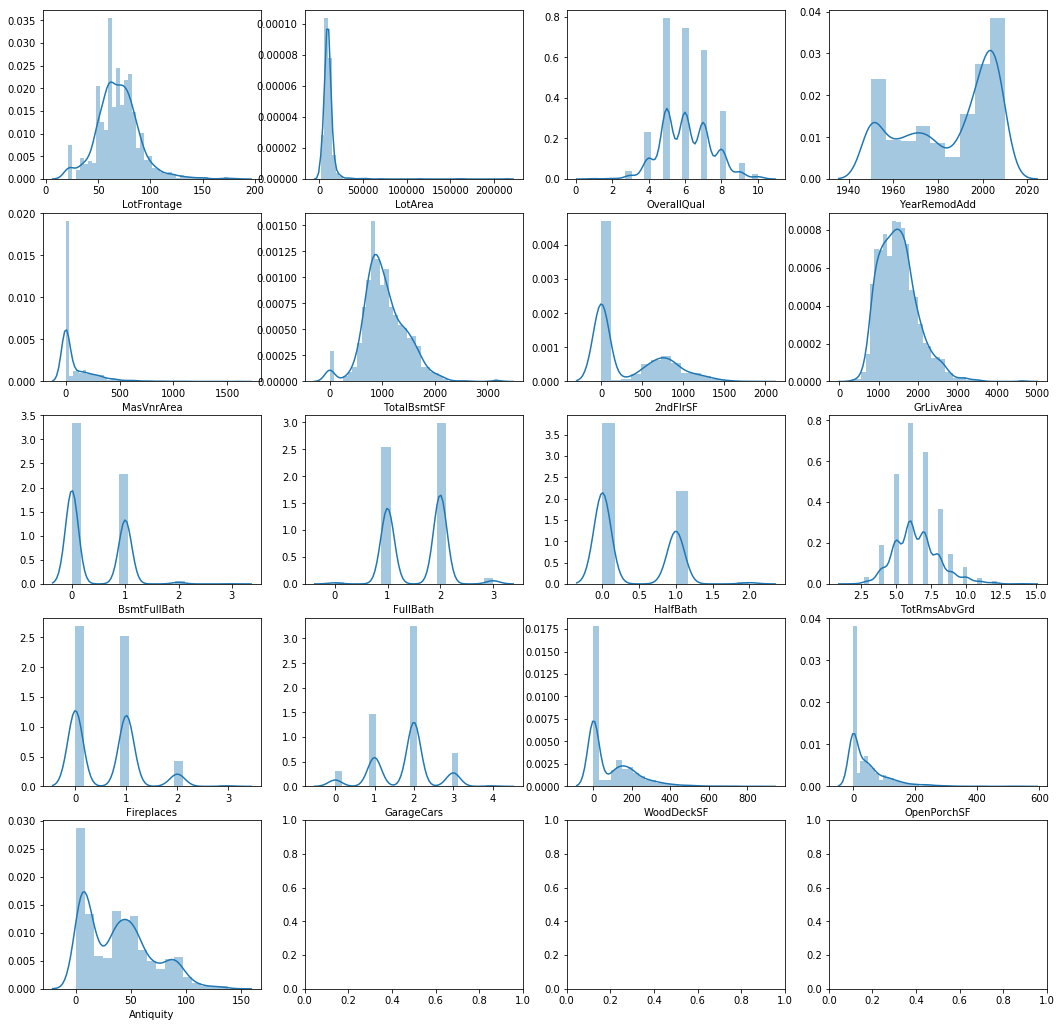

In [187]:
f,ax=plt.subplots(5,4,figsize=(18,18)) # Subplots
ax = ax.flatten()
#sns.distplot(df_train["LotFrontage"], ax=ax[0])
for i, col in enumerate(numeric.columns):
    #print (i,col)
    #if col != "LotArea":
    sns.distplot(numeric[col], ax=ax[i])


In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train = scaler.fit_transform(numeric)
scaled_test = scaler.transform(numeric_test)

df_train[list(numeric.columns.values)] = scaled_train
df_test[list(numeric.columns.values)] = scaled_test

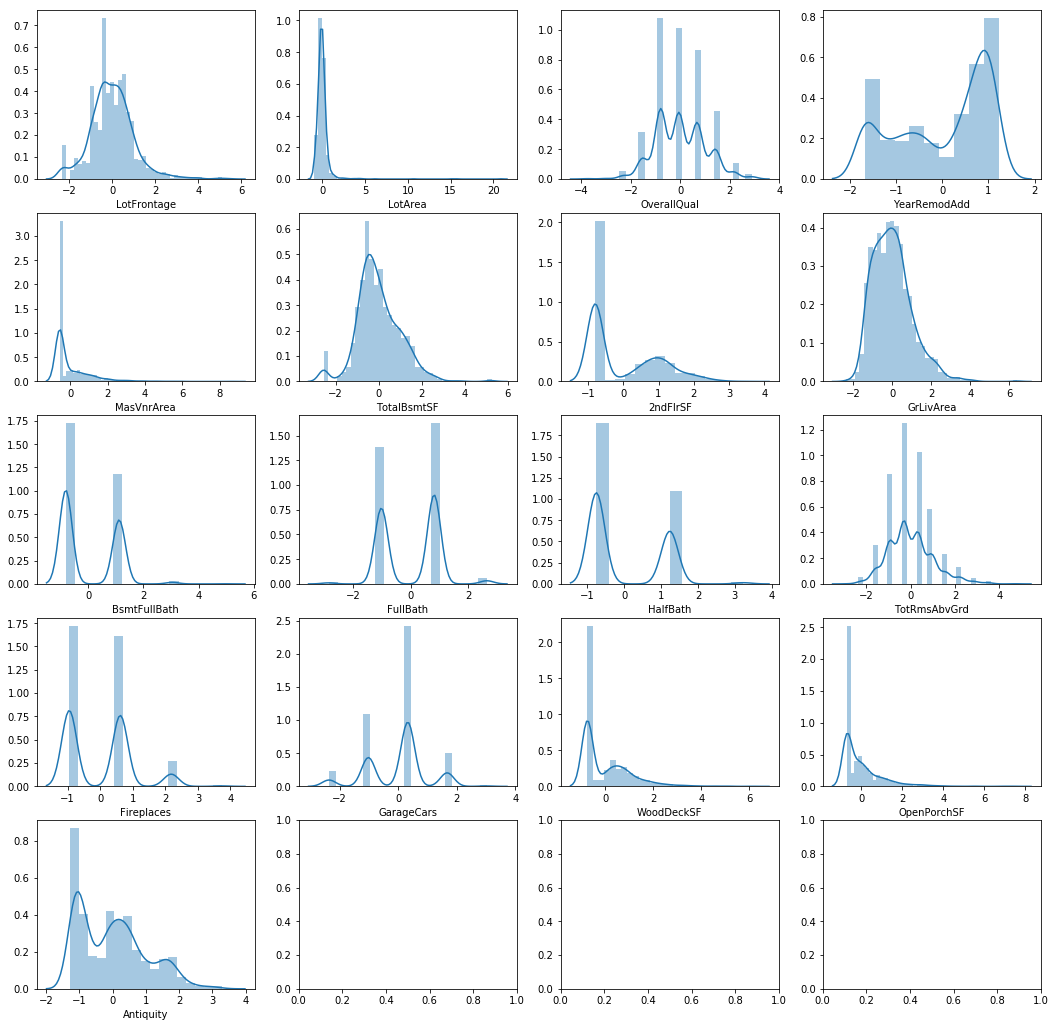

In [189]:
f,ax=plt.subplots(5,4,figsize=(18,18)) # Subplots
ax = ax.flatten()
#sns.distplot(df_train["LotFrontage"], ax=ax[0])
for i, col in enumerate(numeric.columns):
    #print (i,col)
    sns.distplot(df_train[col], ax=ax[i])

In [190]:
#SalePrices, _ = boxcox(SalePrices.values)
skewed_feats = df_train[skewed_feats_index].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats

LotArea        12.778200
MasVnrArea      2.565329
2ndFlrSF        0.766348
GrLivArea       0.926199
WoodDeckSF      1.549799
OpenPorchSF     2.375917
dtype: float64

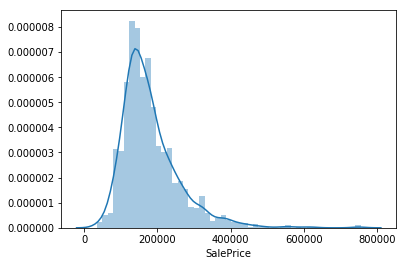

In [191]:
sns.distplot(SalePrices)

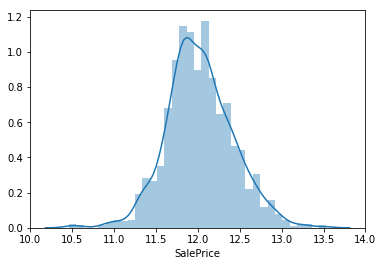

In [192]:
SalePrices_Norm = np.log1p(SalePrices)
sns.distplot(SalePrices_Norm)

In [193]:
#dummies
dummies = pd.get_dummies(category, drop_first=True)
dummies_test = pd.get_dummies(category_test, drop_first=True)
dummies_not_in_test = [ dummy for dummy in list(dummies.columns.values) if dummy not in list(dummies_test.columns.values)]
dummies.drop(dummies_not_in_test, axis=1, inplace=True)

df_train_prepared = df_train.join(dummies)
df_train_prepared.drop(list(category.columns.values), axis=1, inplace=True)
y = df_train.SalePrice
y_norm = np.log1p(df_train.SalePrice)
df_train_prepared.drop(["SalePrice"], axis=1, inplace=True)
df_test_prepared = df_test.join(dummies_test)
df_test_prepared.drop(list(category.columns.values), axis=1, inplace=True)

# Modeling

In [194]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
import math
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


In [213]:
def rmsle(y_true, y_pred):
    return math.sqrt(abs(mean_squared_log_error(y_true, y_pred)))

def rmse_cv(model, X_train, y):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


In [215]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha), df_train_prepared, y_norm).mean() 
            for alpha in alphas]

In [216]:
cv_ridge

[0.13812916102784648,
 0.13701828514736197,
 0.13424996785846513,
 0.1309707504982346,
 0.129192581037447,
 0.128808168380897,
 0.12878465439058912,
 0.12910650721056918,
 0.13036419796610088,
 0.13188951550540887,
 0.13342839909730247]

In [211]:
X_train, X_test, y_train, y_test = train_test_split(df_train_prepared, y, test_size=0.3)
predictors = [Ridge(),
              DecisionTreeRegressor(),
              SVR(),
              RandomForestRegressor(),
              AdaBoostRegressor(),
              GradientBoostingRegressor()]

for predictor in predictors:
    predictor.fit(X_train, y_train)
    print (predictor.__class__, rmsle(y_test, predictor.predict(X_test)))


<class 'sklearn.linear_model.ridge.Ridge'> 0.15434720153396356
<class 'sklearn.tree.tree.DecisionTreeRegressor'> 0.20301689323314348
<class 'sklearn.svm.classes.SVR'> 0.39268133264071003
<class 'sklearn.ensemble.forest.RandomForestRegressor'> 0.14401904260762585
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> 0.17478661629718015
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> 0.12730081782474206


In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def cv_score(clf, X, y, n_splits=5):
    # cv = ShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=0)
    scores = cross_val_score(clf, X, y, cv=n_splits, scoring='neg_mean_squared_error')
    print(clf.__class__, "srmle: %0.5f , rmle: %0.5f (+/- %0.5f)" % (np.sqrt(abs(scores.mean())), scores.mean(), scores.std() * 2))
    return abs(scores.mean())

def perform_grid_search(clf, param_grid, X, y, cv=5):
    grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='neg_mean_squared_log_error')
    grid_search.fit(X, y)
    print ("Best params", grid_search.best_params_)
    return grid_search.best_estimator_

def score(predictor, X, y):
    msle = mean_squared_log_error(y, predictor.predict(X))
    print (math.sqrt(msle), msle)


In [218]:
for predictor in predictors:
    cv_score(predictor, df_train_prepared, y_norm)


<class 'sklearn.linear_model.ridge.Ridge'> srmle: 0.13196 , rmle: -0.01741 (+/- 0.00880)
<class 'sklearn.tree.tree.DecisionTreeRegressor'> srmle: 0.21116 , rmle: -0.04459 (+/- 0.00737)
<class 'sklearn.svm.classes.SVR'> srmle: 0.12735 , rmle: -0.01622 (+/- 0.00597)
<class 'sklearn.ensemble.forest.RandomForestRegressor'> srmle: 0.15360 , rmle: -0.02359 (+/- 0.00368)
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> srmle: 0.17164 , rmle: -0.02946 (+/- 0.00432)
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> srmle: 0.13260 , rmle: -0.01758 (+/- 0.00335)


In [199]:
scores = {}
ridge_param_grid = {
    "alpha":[10, 15,16, 17, 18, 19, 20] #Regularization strenght, higher alpha, more reg
}
ridge_regressor = perform_grid_search(Ridge(), ridge_param_grid, df_train_prepared, y_norm)
#ridge_regressor = perform_grid_search(Ridge(), ridge_param_grid, X_train, y_train)# df_train_prepared, y)
scores["ridge"] = cv_score(ridge_regressor, df_train_prepared, y_norm)

Best params {'alpha': 10}
<class 'sklearn.linear_model.ridge.Ridge'> srmle: 0.01005 , rmle: -0.00010 (+/- 0.00005)


In [200]:
tree_param_grid = {
    "max_depth": [5, 7, 10, 20, 50, 100]
}
tree_regressor = perform_grid_search(DecisionTreeRegressor(), tree_param_grid, df_train_prepared, y_norm)
scores["tree"] = cv_score(tree_regressor, df_train_prepared, y_norm)

Best params {'max_depth': 7}
<class 'sklearn.tree.tree.DecisionTreeRegressor'> srmle: 0.01543 , rmle: -0.00024 (+/- 0.00003)


In [201]:
rf_tree_param_grid = {
    "max_depth": [8, 10,15, 20, 50, 100],
    "n_estimators": [20, 50, 100, 150]
}
rf_tree_regressor = perform_grid_search(RandomForestRegressor(), rf_tree_param_grid, df_train_prepared, y_norm)
scores["rf"] = cv_score(rf_tree_regressor, df_train_prepared, y_norm)

Best params {'max_depth': 20, 'n_estimators': 100}
<class 'sklearn.ensemble.forest.RandomForestRegressor'> srmle: 0.01133 , rmle: -0.00013 (+/- 0.00002)


In [202]:
ada_param_grid = {
    "n_estimators":[20, 50, 70, 100, 150],
    "learning_rate": [1, 10, 100, 0.1]
}
ada_regressor = perform_grid_search(AdaBoostRegressor(), ada_param_grid, df_train_prepared, y_norm)
scores["ada"] = cv_score(ada_regressor, df_train_prepared, y_norm)

Best params {'learning_rate': 0.1, 'n_estimators': 150}
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> srmle: 0.01320 , rmle: -0.00017 (+/- 0.00003)


In [208]:
rmsle(y_norm, (ada_regressor.predict(df_train_prepared)))

0.012194750022418115

In [143]:
gb_param_grid = {
    "n_estimators": [10, 20, 50, 100, 150],
    "max_depth": [5, 10, 20, 50, 100]
}
gb_regressor = perform_grid_search(GradientBoostingRegressor(), gb_param_grid, df_train_prepared, y)
scores["gb"] = cv_score(gb_regressor, df_train_prepared, y)

Best params {'max_depth': 5, 'n_estimators': 150}
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> srmle: 0.13787 , rmle: -0.01901 (+/- 0.00310)


In [144]:
xgb_param_grid = {
    "n_estimators": [10, 20, 50, 100, 150],
    "max_depth": [5, 10, 20, 50, 100]
}
xgb_regressor = perform_grid_search(XGBRegressor(), xgb_param_grid, df_train_prepared, y)
scores["xgb"] = cv_score(xgb_regressor, df_train_prepared, y)


Best params {'max_depth': 5, 'n_estimators': 150}
<class 'xgboost.sklearn.XGBRegressor'> srmle: 0.13553 , rmle: -0.01837 (+/- 0.00396)


In [145]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Lasso


stack = StackingCVRegressor(regressors = (ridge_regressor, tree_regressor, rf_tree_regressor, ada_regressor, gb_regressor, xgb_regressor), meta_regressor = Ridge())
cv_score(stack, df_train_prepared.values, y.values)

stack.fit(df_train_prepared.values, y.values)

<class 'mlxtend.regressor.stacking_cv_regression.StackingCVRegressor'> srmle: 0.12624 , rmle: -0.01594 (+/- 0.00401)


StackingCVRegressor(cv=5,
          meta_regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          regressors=(Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001), DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_spli...,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)),
          shuffle=True, store_train_meta_features=False,
          use_features_in_secondary=False)

In [146]:
scores["stack"] = cv_score(stack, df_train_prepared.values, y.values)

<class 'mlxtend.regressor.stacking_cv_regression.StackingCVRegressor'> srmle: 0.12723 , rmle: -0.01619 (+/- 0.00382)
